In [167]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

from sklearn.datasets import make_biclusters, make_blobs, make_classification
from sklearn.svm import SVC, LinearSVC

In [398]:
def graph_classes(x,y):
    fig = plt.figure(figsize=(10,5))
    for n in set(y):
        plt.scatter(x[y==n,0],x[y==n,1])

In [17]:
x, y = make_blobs(cluster_std=2.5,centers=2,random_state=1)

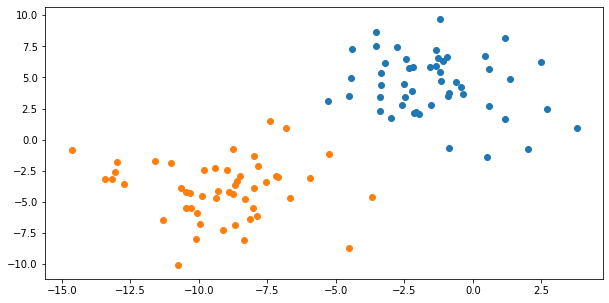

In [399]:
graph_classes(x,y)

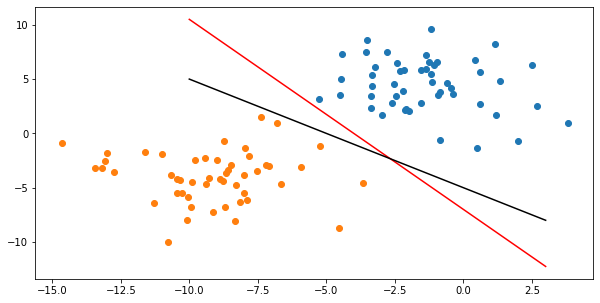

In [400]:
graph_classes(x,y)
xx = np.linspace(-10,3,20)
yy = -1.75*xx - 7
yy_2 = -1*xx -5
plt.plot(xx,yy, c='r')
plt.plot(xx,yy_2, c='k')

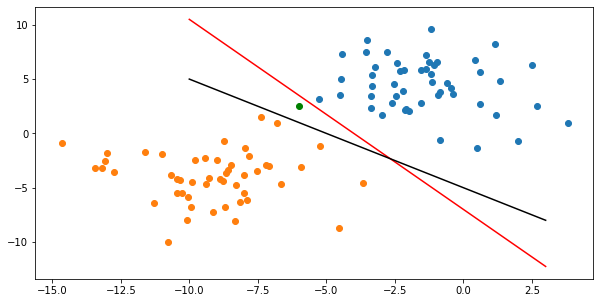

In [401]:
graph_classes(x,y)
xx = np.linspace(-10,3,20)
yy = -1.75*xx - 7
yy_2 = -1*xx -5
plt.plot(xx,yy, c='r')
plt.plot(xx,yy_2, c='k')
plt.scatter(-6,2.5,c='g')

In [37]:
min([n[0] for n in x])

-14.642667164769982

In [56]:
x[1]

array([-7.88231088, -6.1021384 ])

In [67]:
def find_distance_to_line(x,y,slope,intercept):
    a = slope
    b = -1
    dist = np.absolute(a*x + b*y + intercept)/((a**2 + b**2)**.5)
    return dist

In [62]:
find_distance_to_line(x[1][0],x[1][1],-1.75,-7)

6.398298268433888

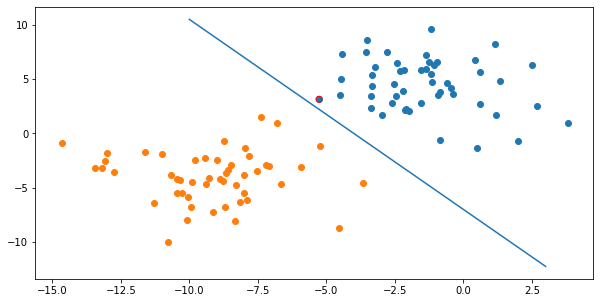

In [402]:
graph_classes(x,y)
plt.plot(xx,yy)
distances = [find_distance_to_line(x[n][0],x[n][1],-1.75,-7) for n in range(0,len(x))]

plt.scatter(x[np.argmin(distances)][0],x[np.argmin(distances)][1],facecolors='none',edgecolors='r',marker='o')
    

In [79]:
def point_on_line(x,y,slope,intercept):
    a = slope
    b = -1
    x_value = (b*(b*x - a*y)-a*intercept)/(a**2 + b**2)
    y_value = (a*(-b*x + a*y)-b*intercept)/(a**2 + b**2)
    return x_value, y_value

In [82]:
x_line, y_line = point_on_line(x[1][0],x[1][1],-1.75,-7)
x_line

-2.3270322918559923

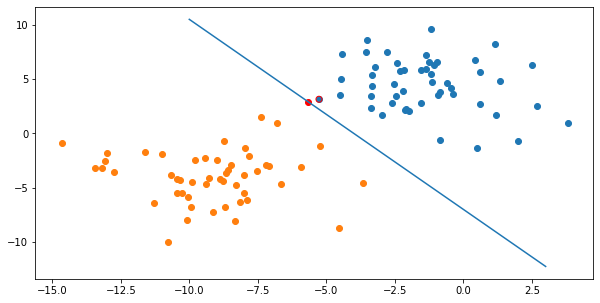

In [403]:
graph_classes(x,y)
plt.plot(xx,yy)
distances = [find_distance_to_line(x[n][0],x[n][1],-1.75,-7) for n in range(0,len(x))]
argmin = np.argmin(distances)
plt.scatter(x[argmin][0],x[argmin][1],facecolors='none',edgecolors='r',marker='o')
x_line, y_line = point_on_line(x[argmin][0],x[argmin][1],-1.75,-7)
plt.scatter(x_line,y_line,c='r')

In [176]:
def graph_max_margin(x,y,slope,intercept):
    x_min = min([n[0] for n in x])
    x_max = max([n[0] for n in x])
    y_min = min([n[1] for n in x])
    y_max = max([n[1] for n in x])
    
    xx = np.linspace(x_min,x_max,20)
    yy = slope*xx + intercept
    
    fig= plt.figure(figsize=(10,5))
    plt.xlim(1.05*x_min,1.05*x_max)
    plt.ylim(1.05*y_min,1.05*y_max)
    for n in set(y):
        plt.scatter(x[y==n,0],x[y==n,1])
    plt.plot(xx,yy)
    
    distances = [find_distance_to_line(x[n][0],x[n][1],slope,intercept) for n in range(0,len(x))]
    argmin = np.argmin(distances)
    plt.scatter(x[argmin][0],x[argmin][1],facecolors='none',edgecolors='r',marker='o')
    
    vertical_shift = intercept +(slope*x[argmin][0] - x[argmin][1])
    plt.plot(xx,yy-vertical_shift,c='r')
    plt.plot(xx,yy+vertical_shift,c='r')
    
    plt.fill_between(xx, yy-vertical_shift, yy+vertical_shift, facecolor='r', alpha=.1)
    
    props = dict(boxstyle='round', facecolor='cornflowerblue', alpha=0.9)
    plt.text(x_min, y_max*.9, f'Coefficient: {slope} \n Intercept: {intercept}',
             fontsize=14, verticalalignment='top',bbox=props)

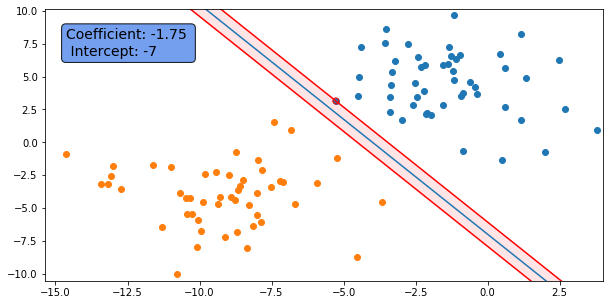

In [177]:
graph_max_margin(x,y,-1.75,-7)

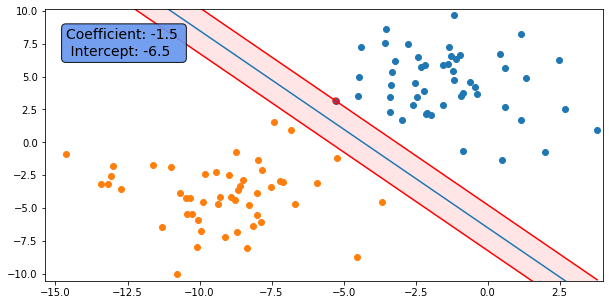

In [178]:
graph_max_margin(x,y,-1.5,-6.5)

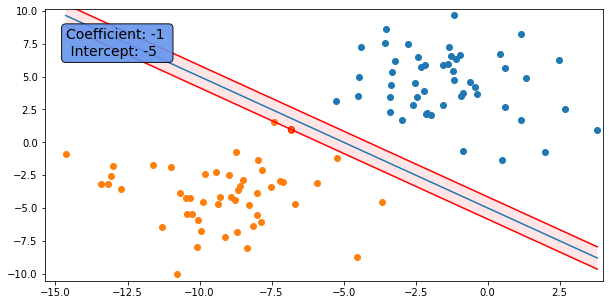

In [191]:
graph_max_margin(x,y,-1,-5)

In [311]:
def graph_multi_margin(x,y,lines):
    x_min = min([n[0] for n in x])
    x_max = max([n[0] for n in x])
    y_min = min([n[1] for n in x])
    y_max = max([n[1] for n in x])
    
    fig= plt.figure(figsize=(10,5))
    plt.xlim(1.05*x_min,1.05*x_max)
    plt.ylim(1.05*y_min,1.05*y_max)
    for n in set(y):
        plt.scatter(x[y==n,0],x[y==n,1])
    
    
    for line in lines:
        slope = line[0]
        intercept = line[1]
        xx = np.linspace(x_min,x_max,20)
        yy = slope*xx + intercept
        plt.plot(xx,yy)
        distances = [find_distance_to_line(x[n][0],x[n][1],slope,intercept) for n in range(0,len(x))]
        argmin = np.argmin(distances)
        plt.scatter(x[argmin][0],x[argmin][1],facecolors='none',edgecolors='r',marker='o')
        
        vertical_shift = intercept +(slope*x[argmin][0] - x[argmin][1])
        plt.plot(xx,yy-vertical_shift,c='r')
        plt.plot(xx,yy+vertical_shift,c='r')
    
        plt.fill_between(xx, yy-vertical_shift, yy+vertical_shift, facecolor='r', alpha=.1)

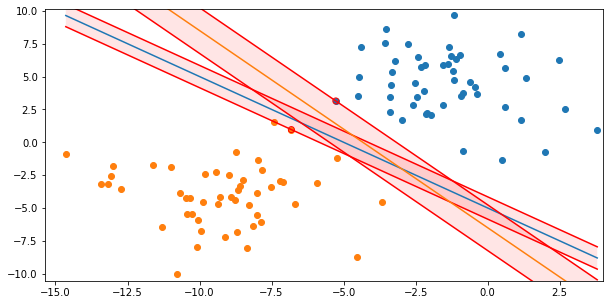

In [316]:
graph_multi_margin(x,y,((-1,-5),(-1.5,-6.5)))

In [295]:
def graph_svm(x,y, kernel, C):
    x_min = min([n[0] for n in x])
    x_max = max([n[0] for n in x])
    y_min = min([n[1] for n in x])
    y_max = max([n[1] for n in x])
    
    fig= plt.figure(figsize=(10,5))
    for n in set(y):
        plt.scatter(x[y==n,0],x[y==n,1])
        
    xx = np.linspace(x_min,x_max,20)
    yy = np.linspace(y_min,y_max,20)
    
    svm = SVC(kernel=kernel, C=C)
    svm.fit(x,y)
    
    YY, XX = np.meshgrid(yy, xx)
    xy = np.vstack([XX.ravel(), YY.ravel()]).T
    Z = svm.decision_function(xy).reshape(XX.shape)
    
    plt.contour(XX, YY, Z, colors='r', levels=[-1, 0, 1], alpha=1,
               linestyles=['--', '-', '--'])
    plt.contourf(XX, YY, Z, colors='r', levels=[-1, 0, 1], alpha=.1,
               linestyles=['-', '-', '_'])
    
    plt.scatter(svm.support_vectors_[:, 0], svm.support_vectors_[:, 1], s=100,
           linewidth=1, facecolors='none', edgecolors='k')


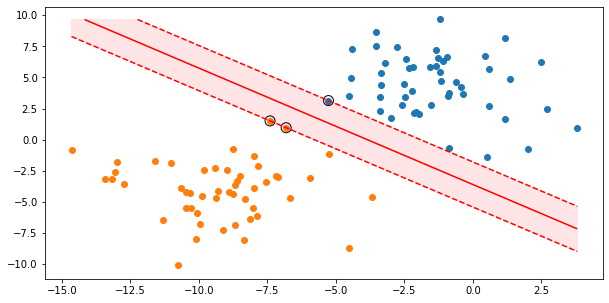

In [317]:
graph_svm(x,y, 'linear', 1)

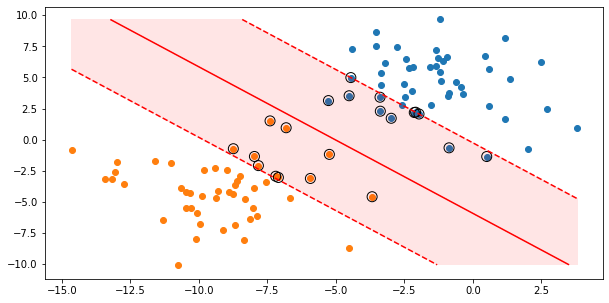

In [330]:
graph_svm(x,y, 'linear', .005)

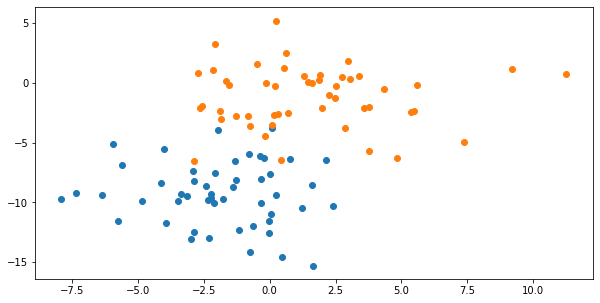

In [405]:
x_2, y_2 = make_blobs(cluster_std=2.5,centers=2,random_state=2)
graph_classes(x_2,y_2)

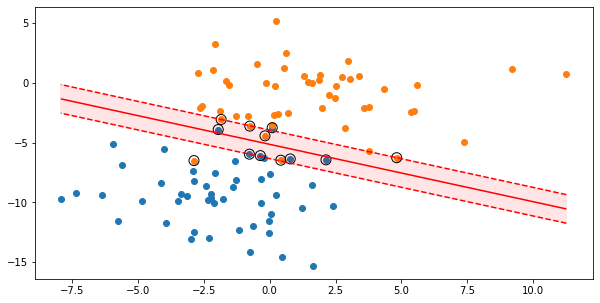

In [328]:
graph_svm(x_2,y_2, 'linear', 10)

/anaconda3/lib/python3.7/site-packages/sklearn/svm/base.py:196: FutureWarning: The default value of gamma will change from 'auto' to 'scale' in version 0.22 to account better for unscaled features. Set gamma explicitly to 'auto' or 'scale' to avoid this warning.
  "avoid this warning.", FutureWarning)


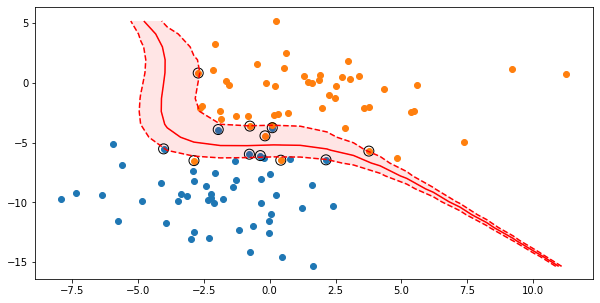

In [325]:
graph_svm(x_2,y_2, 'poly', 5)

In [371]:
x_4, y_4 = make_blobs(cluster_std=2.5,centers=2,random_state=8)
x_3 = np.concatenate((x_2,x_4), axis=0)
y_3 = np.concatenate((y_2,y_4), axis=0)

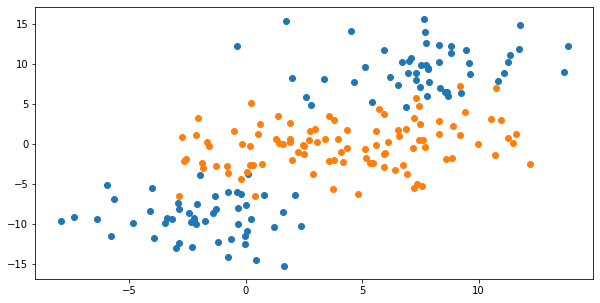

In [404]:

graph_classes(x_3,y_3)

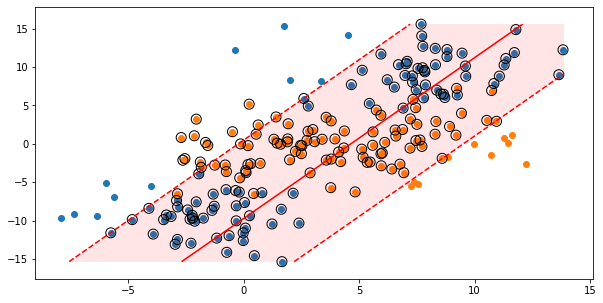

In [396]:
graph_svm(x_3,y_3, 'linear', 100)

In [388]:
def graph_svm_gamma(x,y, kernel, C, gamma):
    x_min = min([n[0] for n in x])
    x_max = max([n[0] for n in x])
    y_min = min([n[1] for n in x])
    y_max = max([n[1] for n in x])
    
    fig= plt.figure(figsize=(10,5))
    for n in set(y):
        plt.scatter(x[y==n,0],x[y==n,1])
        
    xx = np.linspace(x_min,x_max,20)
    yy = np.linspace(y_min,y_max,20)
    
    svm = SVC(kernel=kernel, C=C,gamma=gamma)
    svm.fit(x,y)
    
    YY, XX = np.meshgrid(yy, xx)
    xy = np.vstack([XX.ravel(), YY.ravel()]).T
    Z = svm.decision_function(xy).reshape(XX.shape)
    
    plt.contour(XX, YY, Z, colors='r', levels=[-1, 0, 1], alpha=1,
               linestyles=['--', '-', '--'])
    plt.contourf(XX, YY, Z, colors='r', levels=[-1, 0, 1], alpha=.1,
               linestyles=['-', '-', '_'])
    
    plt.scatter(svm.support_vectors_[:, 0], svm.support_vectors_[:, 1], s=100,
           linewidth=1, facecolors='none', edgecolors='k')

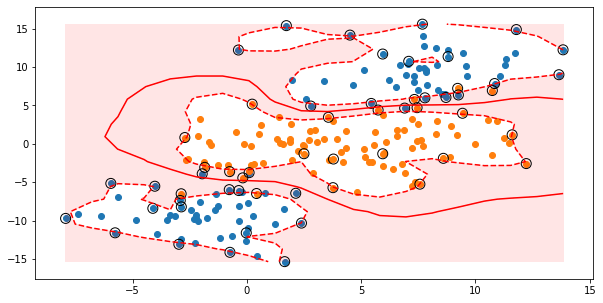

In [409]:
graph_svm_gamma(x_3,y_3, 'rbf', 5,.09)

In [222]:
vectors_1 = [[1,-3]]*len(x[y==0])
vectors_2 = [[1-point[0],-8-point[1]] for point in x[y==0]]

In [224]:
all(result < 0 for result in np.cross(vectors_1,vectors_2)) or all(result >0 for result in np.cross(vectors_1,vectors_2))




SyntaxError: invalid syntax (<ipython-input-224-f7462cfa72b8>, line 1)

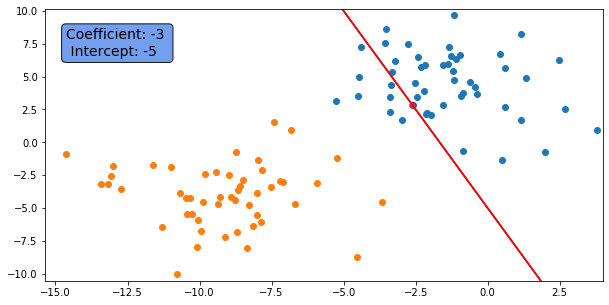

In [221]:
graph_max_margin(x,y,-3,-5)